*19.06.2020 | Deep Learning for Computer Vision | Universität Osnabrück*


---

# Face Detection
------------


This demo is supposed to illustrate the differences of classical face detection approaches and deep learning approaches.

For the classical approach the Histogram of Oriented Gradients (HOG) method is used. For simplicity reasons this method is applied using the ```face_recognition``` module. ```model='hog'``` is set by default in the function ```face_recogition.face_locations()```.

The exact same module also offers the option to use a cnn based detector instead of the HOG based detector, which is illustrated in the second code example. For this we set the ```model``` attribute in the ```face_recogition.face_locations()``` function to ```model='cnn'```.

The third approach this demo will illustrate is the use of an implementation of the Multi-Task Cascaded Convolutional Networks for Face Detection.  

## Preparation 

We need to install the ```face_recognition``` as well as the ```mtcnn``` Python packages. 

In [0]:
%%capture

!pip install face_recognition
!pip install mtcnn


The usages and performances of the different approaches will all be presented on one sample image. For this we use a random copy-free group image that was found on [www.unsplash.com](www.unsplash.com). 

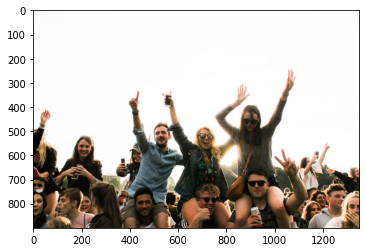

In [2]:
import os
import matplotlib.pyplot as plt

# Download sample image if not yet downloaded
if not os.path.exists("/content/group_image.jpg"):
    %%capture
    !wget --output-document "group_image.jpg" "https://images.unsplash.com/photo-1501238295340-c810d3c156d2?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80"

# Set image path
image_path = "group_image.jpg"

# Preview picture
img = plt.imread(image_path)
plt.imshow(img)


## Face Detection with Classical CV (Histogram of Oriented Gradients)


I found 10 face(s) in this photograph.


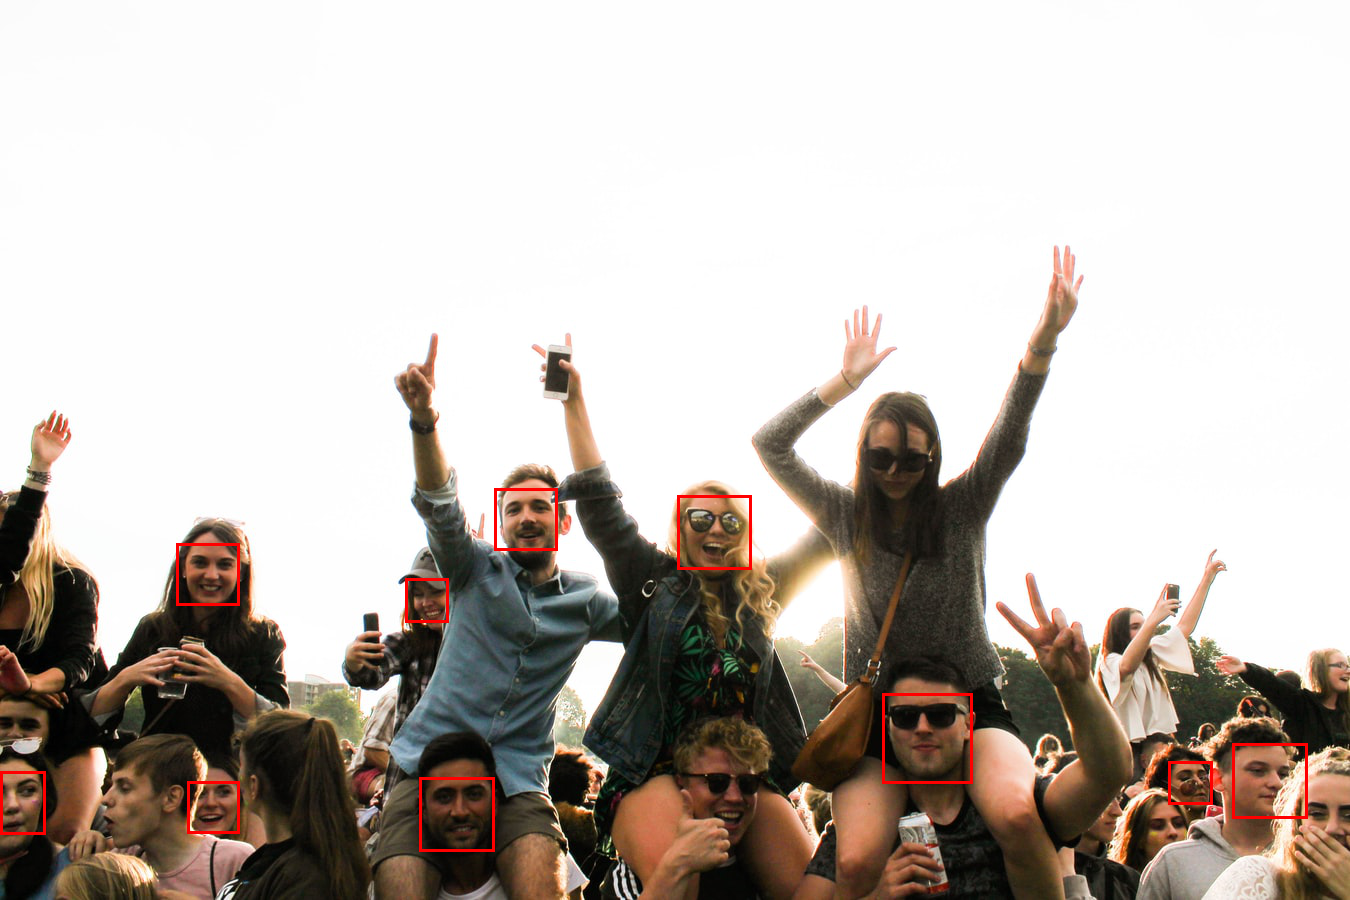

In [21]:
import PIL.Image, PIL.ImageDraw
import face_recognition

# Load image
image = face_recognition.load_image_file(image_path)

# Detect faces using HOG method
face_locations = face_recognition.face_locations(image, model="hog")

# Print number of found faces
number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom,
    # left) order.
    top, right, bottom, left = face_location

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red", width=3)

# Display the image on screen
# pil_image.show() does not work in Google Colab.
pil_image


## Face Detection using CNNs (w/ face_recognition module)



```face_recognition.face_locations(image, model="cnn")``` allows you to use a pretrained CNN for face detection instead of the HOG approach.

Both, ```model='hog'``` and ```model='cnn'```, in fact are Max-Margin Object Detectors (MMOD). To learn more about MMODs, please refer to this [paper](https://arxiv.org/pdf/1502.00046.pdf). The way in which those to methods differ is which kind of features get fed into the detector. Obviously, the CNN-MMOD (used by the function ```face_recognition.face_locations(image, model="cnn")```) is trained with features extracted from a convolutional neural network instead of a HOG. 

Unfortunately, we could not find more details on the CNN used. Nevertheless, you can find more information regarding this specific method in the original [blog post](http://blog.dlib.net/2016/10/easily-create-high-quality-object.html).

I found 15 face(s) in this photograph.


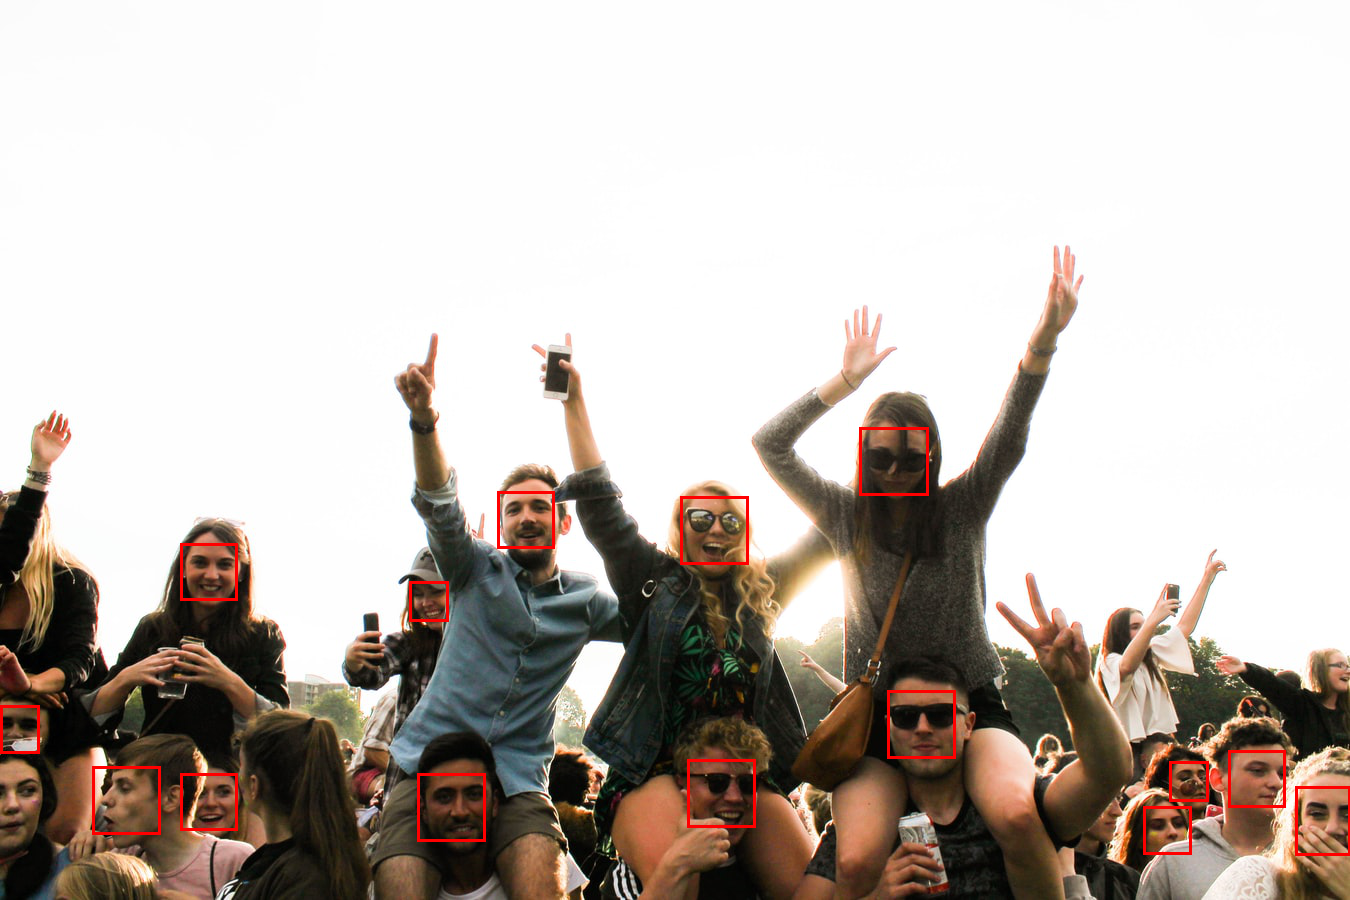

In [23]:
#Load image
image = face_recognition.load_image_file(image_path)

#Detect faces. This time using the CNN approach
face_locations = face_recognition.face_locations(image, model="cnn")

number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom,
    # left) order.
    top, right, bottom, left = face_location

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red", width=3)

# Display the image on screen
pil_image


## Face detection with MTCNN

The ```mtcnn``` library was built by Iván de Paz Centeno. It is written from scratch, using as a reference the implementation of MTCNN from David Sandberg [FaceNet's MTCNN](https://github.com/davidsandberg/facenet/tree/master/src/align) in Facenet. It is based on the paper "*Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks*" by [Zhang, K et al. (2016)](https://arxiv.org/ftp/arxiv/papers/1604/1604.02878.pdf).

The source code and documentation of this library can be found on [the author's GitHub](https://github.com/ipazc/mtcnn).

I have found 19 faces in this picture


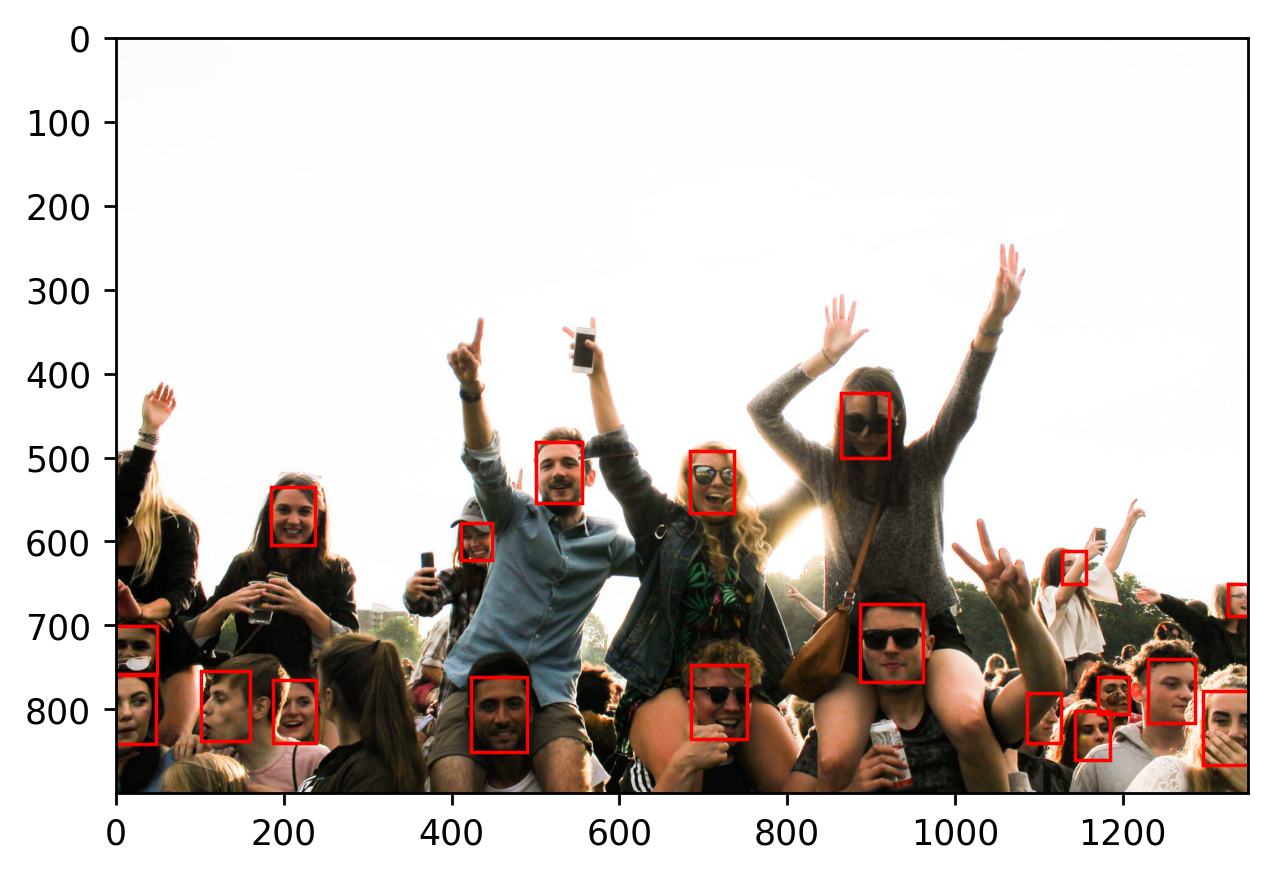

In [25]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
    # plot the image
	pyplot.figure(dpi=250)
	pyplot.imshow(data)  
    # get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box

	for result in result_list:
	    # get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	    # show the plot
	pyplot.show()

filename = image_path
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
print('I have found {} faces in this picture'.format(len(faces)))
draw_image_with_boxes(filename, faces)